# Predicting Stroke Based on Number of Attributes


In this Analysis I will try to predict which attribute increase/decrease the chances of a stroke.
First I will perform data preparation and analysis, then I will visualize the data with graphs and charts which will let me draw different insights.
I will use Python with 4 libraries: Numpy, Pandas, Matplotlib, and Seaborn.


## Downloading the Dataset

I downloaded a CSV file about strokes from Kaggle.com and I can open the file using the read_csv method from Pandas.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
stroke_df= pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


We can see that the file is a Pandas data frame that has 12 columns and 5110 rows.

In [ ]:
print(stroke_df.shape)
type(stroke_df)

(5110, 12)


pandas.core.frame.DataFrame

## Data Preparation and Cleaning

Now I will start preparing the data for further analysis:



I will focus on the effects of BMI, smoking, age, hyper tension, and heart disease.

In [ ]:
final_stroke_df = stroke_df[['age','hypertension','heart_disease','bmi','stroke']].copy()
final_stroke_df

,age,hypertension,heart_disease,bmi,stroke
0,67.0,0,1,36.6,1
1,61.0,0,0,NaN,1
2,80.0,0,1,32.5,1
3,49.0,0,0,34.4,1
4,79.0,1,0,24.0,1
...,...,...,...,...,...
5105,80.0,1,0,NaN,0
5106,81.0,0,0,40.0,0
5107,35.0,0,0,30.6,0
5108,51.0,0,0,25.6,0


Let's check if there's any missing data:

In [ ]:
final_stroke_df.isnull().sum()

age                0
hypertension       0
heart_disease      0
bmi              201
stroke             0
dtype: int64

There are many ways to deal with missing data but since only 201 values for the BMI column are missing we can just fill them with the mean:

In [ ]:
final_stroke_df.fillna(final_stroke_df['bmi'].mean(), inplace=True)
final_stroke_df.isnull().sum()

age              0
hypertension     0
heart_disease    0
bmi              0
stroke           0
dtype: int64

In [ ]:
final_stroke_df.describe()

,age,hypertension,heart_disease,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,28.893237,0.048728
std,22.612647,0.296607,0.226063,7.698018,0.215320
min,0.080000,0.000000,0.000000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,32.800000,0.000000
max,82.000000,1.000000,1.000000,97.600000,1.000000


Some values don't make sense like a max BMI of 97.6 so I'll drop incorrect values

In [ ]:
final_stroke_df.drop(final_stroke_df[final_stroke_df.bmi > 65].index, inplace=True)
final_stroke_df.drop(final_stroke_df[final_stroke_df.age < 1].index, inplace=True)
final_stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5062 entries, 0 to 5109
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            5062 non-null   float64
 1   hypertension   5062 non-null   int64  
 2   heart_disease  5062 non-null   int64  
 3   bmi            5062 non-null   float64
 4   stroke         5062 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 237.3 KB


Now the data has no missing values and more credible information.

## Exploratory Analysis and Visualization

Now that the data is prepared and clean we can start exploring different correlations with graphs and charts:



In [ ]:
final_stroke_df.describe()

,age,hypertension,heart_disease,bmi,stroke
count,5062.000000,5062.000000,5062.000000,5062.000000,5062.000000
mean,43.597938,0.097787,0.054524,28.930432,0.049190
std,22.367466,0.297056,0.227071,7.477554,0.216286
min,1.000000,0.000000,0.000000,10.300000,0.000000
25%,26.000000,0.000000,0.000000,23.900000,0.000000
50%,45.000000,0.000000,0.000000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,32.800000,0.000000
max,82.000000,1.000000,1.000000,64.800000,1.000000


In [ ]:

sns.set_style('darkgrid')

Let's first check out the distribution of ages and BMI using histograms:

Text(0.5, 1.0, 'Distribution of Age')

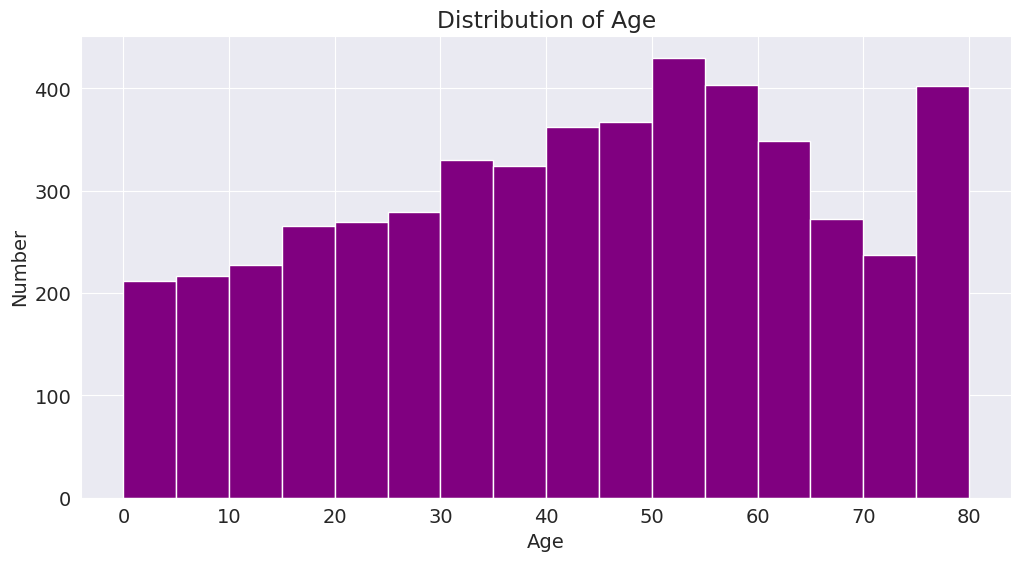

In [ ]:


plt.figure(figsize=(12, 6))
plt.xlabel('Age')
plt.ylabel('Number')

plt.hist(final_stroke_df.age, bins=np.arange(0,85,5), color='purple');
plt.title("Distribution of Age")

There is a pretty even distribution of ages so we have a wide range of data.

<Axes: title={'center': 'Distribution of BMI'}, xlabel='BMI', ylabel='Number'>

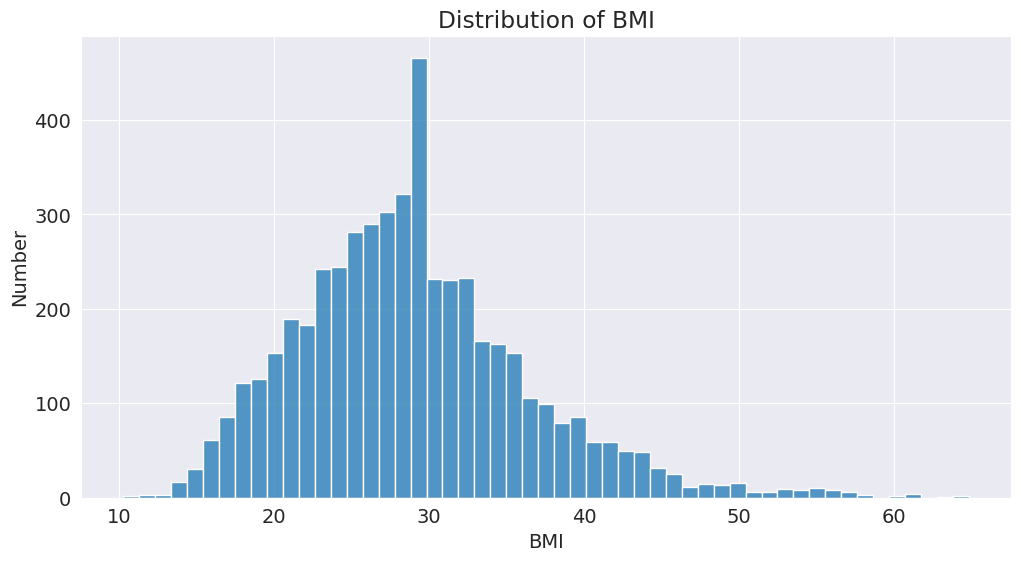

In [ ]:

plt.figure(figsize=(12, 6))
plt.xlabel('BMI')
plt.ylabel('Number')
plt.title("Distribution of BMI")
sns.histplot(final_stroke_df.bmi)


We can see tho that the BMI is a bit high.

In [ ]:
final_stroke_df['bmi'].mean()

28.930432118206028

Let's explore the correlation between the different attributes and chance of stroke:

Text(0.5, 1.0, 'Age Distribution by Stroke Status')

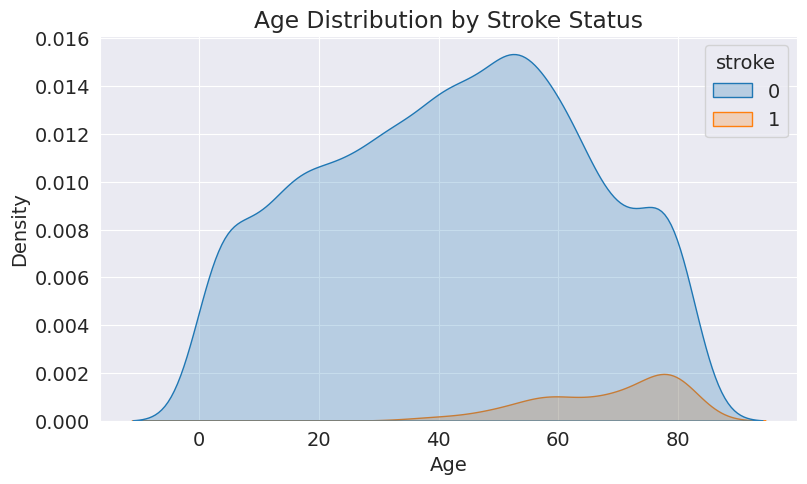

In [ ]:
sns.kdeplot(data=final_stroke_df, x='age', hue='stroke', fill=True)

plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Stroke Status')


Text(0.5, 1.0, 'BMI Distribution by Stroke Status')

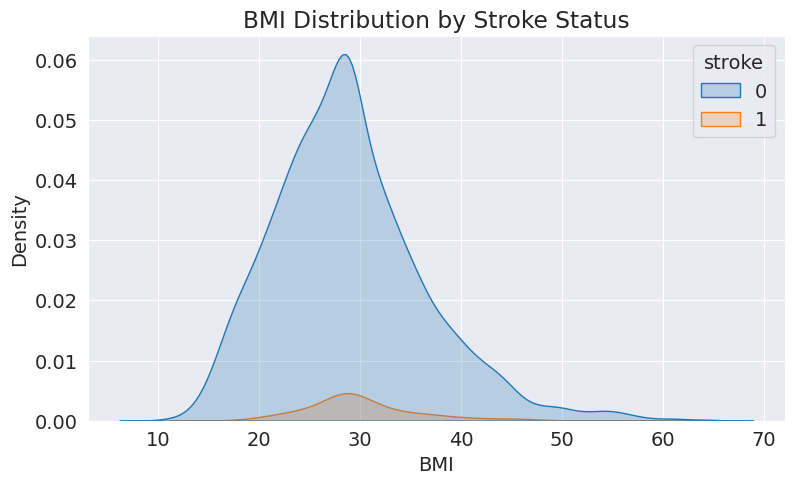

In [ ]:

sns.kdeplot(data=final_stroke_df, x='bmi', hue='stroke', fill=True)

plt.xlabel('BMI')
plt.ylabel('Density')
plt.title('BMI Distribution by Stroke Status')



Text(0.5, 1.0, 'Comparison of Heart Disease and Stroke')

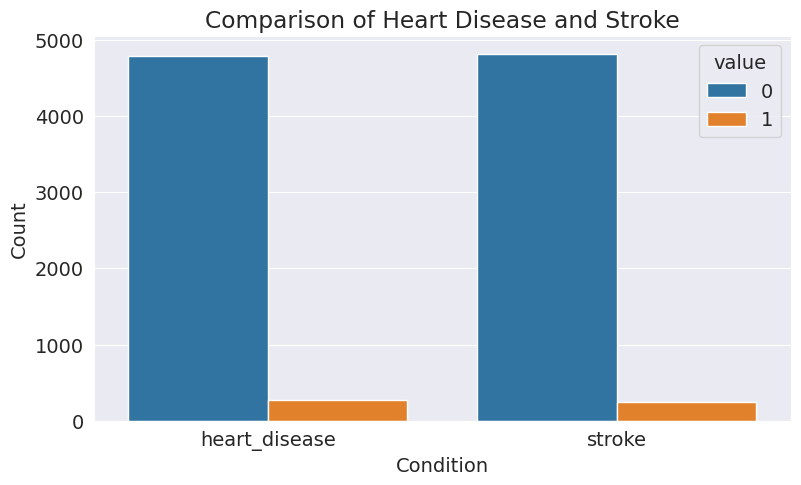

In [ ]:

final_stroke_df_melted = final_stroke_df.melt(value_vars=['heart_disease', 'stroke'])

sns.countplot(data=final_stroke_df_melted, x='variable', hue='value')

plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Comparison of Heart Disease and Stroke')


Text(0.5, 1.0, 'Comparison of Hypertension and Stroke')

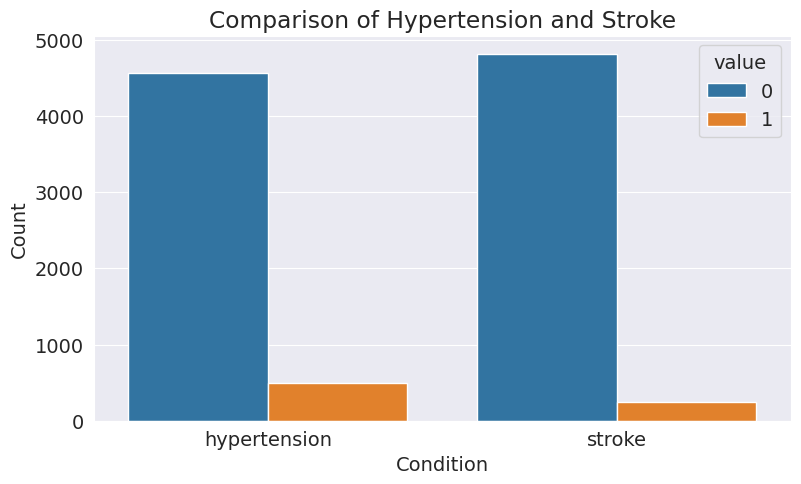

In [ ]:

final_stroke_df_melted = final_stroke_df.melt(value_vars=['hypertension', 'stroke'])

sns.countplot(data=final_stroke_df_melted, x='variable', hue='value')

plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Comparison of Hypertension and Stroke')


We can put the 4 graphs together to get a better understanding overall:

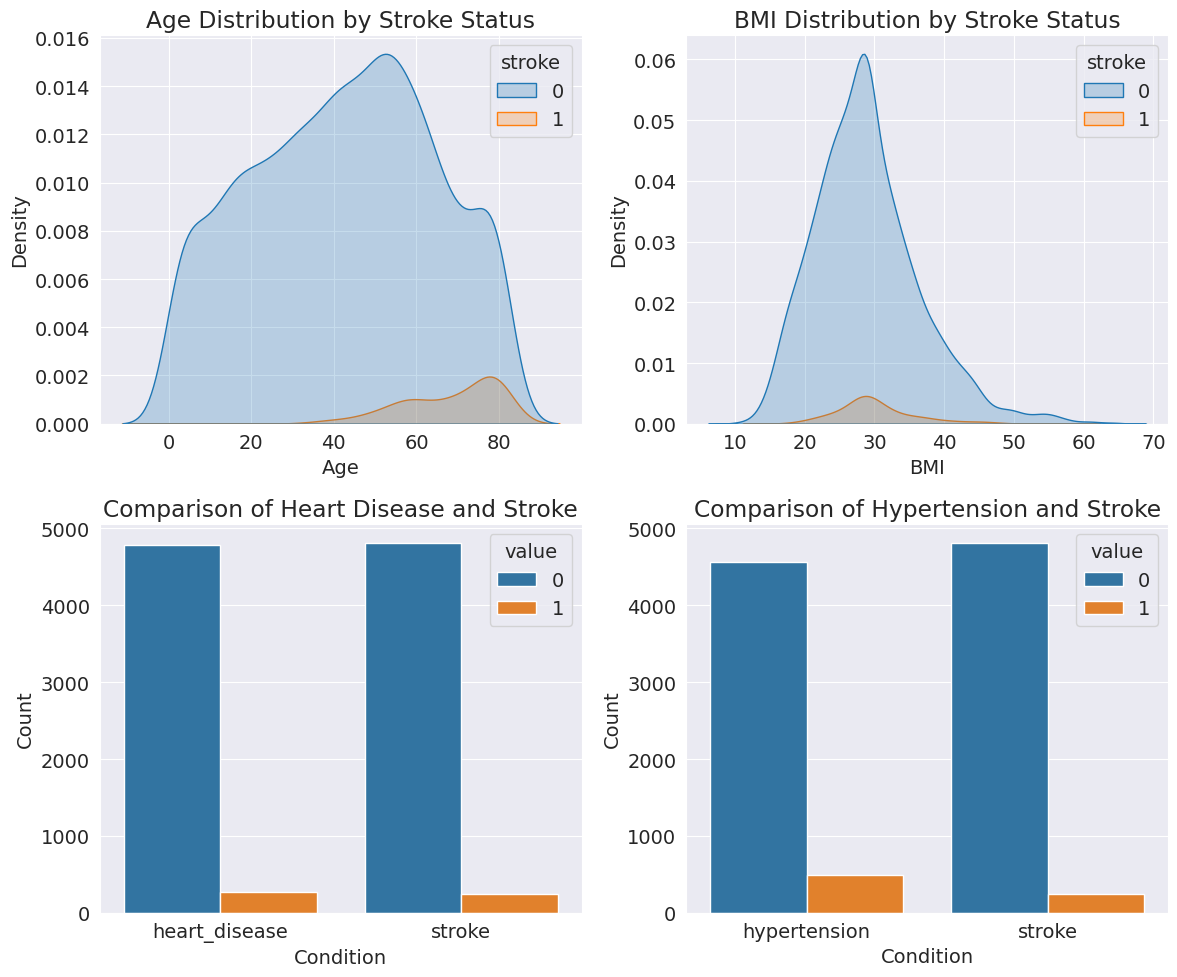

In [ ]:
ig, axes = plt.subplots(2, 2, figsize=(12, 10))

#KDE plot for age distribution by stroke status
sns.kdeplot(data=final_stroke_df, x='age', hue='stroke', fill=True, ax=axes[0, 0])
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Density')
axes[0, 0].set_title('Age Distribution by Stroke Status')

#KDE plot for BMI distribution by stroke status
sns.kdeplot(data=final_stroke_df, x='bmi', hue='stroke', fill=True, ax=axes[0, 1])
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Density')
axes[0, 1].set_title('BMI Distribution by Stroke Status')

#Count plot for heart disease and stroke comparison
final_stroke_df_melted = final_stroke_df.melt(value_vars=['heart_disease', 'stroke'])
sns.countplot(data=final_stroke_df_melted, x='variable', hue='value', ax=axes[1, 0])
axes[1, 0].set_xlabel('Condition')
axes[1, 0].set_ylabel('Count')
axes[1, 0].set_title('Comparison of Heart Disease and Stroke')

#Count plot for hypertension and stroke comparison
final_stroke_df_melted = final_stroke_df.melt(value_vars=['hypertension', 'stroke'])
sns.countplot(data=final_stroke_df_melted, x='variable', hue='value', ax=axes[1, 1])
axes[1, 1].set_xlabel('Condition')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Comparison of Hypertension and Stroke')


plt.tight_layout()

Now we can see that the biggest correlation is between age and stroke chance, the older you are the higher chance of a stroke happening.

Text(0.5, 1.0, 'Correlation Heatmap with stroke')

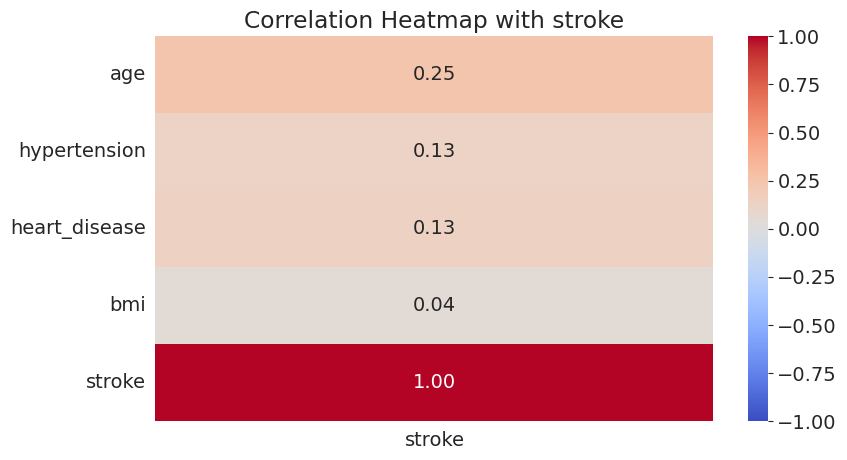

In [ ]:
correlation_matrix = final_stroke_df.corr()

correlation_with_column = correlation_matrix[['stroke']]

sns.heatmap(correlation_with_column, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

plt.title(f'Correlation Heatmap with {"stroke"}')

We can also use a heatmap to see the correlation between "stroke" and every other attribute, 1 means there's a strong correlation and, the lower the number the lower the correlation.

## Extra insights


How many people have had a stroke?

In [ ]:
print((final_stroke_df['stroke'].sum()/len(final_stroke_df['stroke'])*100).round(2),"%")

4.92 %


Around 5 percent or 1 in 20 people have strokes, which means it's a rare occurrence but there is still more risk as you age.

#### What is the distribution of strokes in a graph:

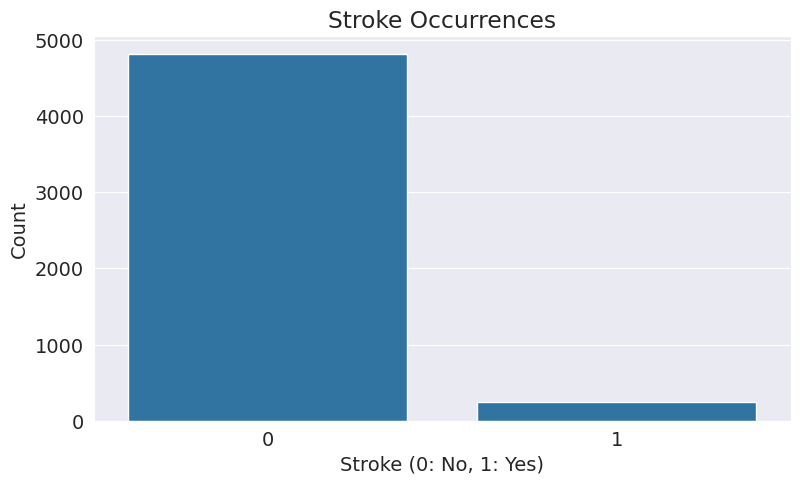

In [ ]:
sns.countplot(data=final_stroke_df, x='stroke')
plt.xlabel('Stroke (0: No, 1: Yes)')
plt.ylabel('Count')
plt.title('Stroke Occurrences')
plt.show()

In [ ]:
correlation_coefficient = final_stroke_df['age'].corr(final_stroke_df['stroke'])
print(f"Correlation coefficient between age and stroke status: {correlation_coefficient}")

Correlation coefficient between age and stroke status: 0.24540294457628753


Boxplot representation:

Text(0.5, 1.0, 'Relationship between Age and Stroke Status')

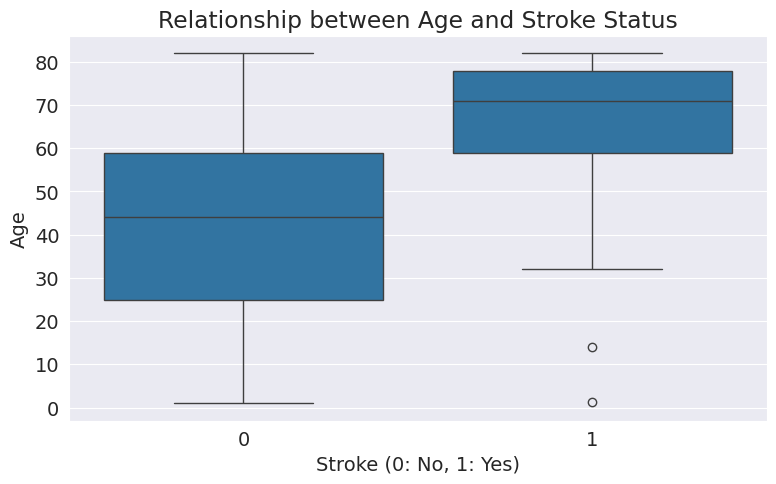

In [ ]:
sns.boxplot(data=final_stroke_df, x='stroke', y='age')
plt.xlabel('Stroke (0: No, 1: Yes)')
plt.ylabel('Age')
plt.title('Relationship between Age and Stroke Status')

## Inferences and Conclusion

In conclusion, the biggest risk factor for stroke that I have checked today is age, followed by heart disease and hypertension, and lastly, the smallest risk factor is BMI.
It's a good idea to be as healthy as possible to lower the chances of diseases and BMI increasing. Still, as age affects the chance of strokes the most there is nothing you can do about it but be aware of the higher risk and look out for any signs in others or yourself.